In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv('olympics.csv')

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
data.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [6]:
data.drop(columns=['Height','Weight','notes'],inplace=True)

In [7]:
data['Medal'].fillna('DWM',inplace=True)

In [8]:
data.dropna(subset=['region'],inplace=True)

In [9]:
data.head()

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DWM,China
1,2,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DWM,China
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DWM,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DWM,Netherlands


In [10]:
values=data['Age'].values

/var/folders/l4/rf2hkt6x1c98p25v4h3vxv9r0000gn/T/ipykernel_16384/2447303793.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(values,shade=False)


<Axes: ylabel='Density'>

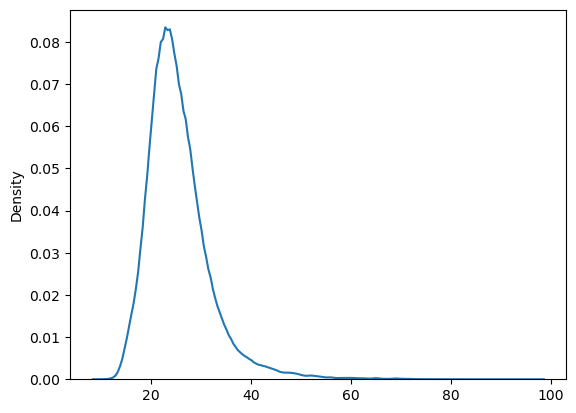

In [11]:
sns.kdeplot(values,shade=False)

In [12]:
hh=data.groupby('Sport')['Age'].transform('mean')

In [13]:
data['Age'].fillna(hh,inplace=True)

In [14]:
data.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [15]:
data.head()

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DWM,China
1,2,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DWM,China
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DWM,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DWM,Netherlands


In [16]:
data=data[data['region']=='UK']

In [17]:
data.head()

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
785,453,Leslie Ablett,M,24.0,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Water Polo,Water Polo Men's Water Polo,DWM,UK
786,453,Leslie Ablett,M,32.0,Great Britain,GBR,1936 Summer,1936,Summer,Berlin,Water Polo,Water Polo Men's Water Polo,DWM,UK
888,509,Gary Abraham,M,17.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Backstroke,DWM,UK
889,509,Gary Abraham,M,17.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 100 metres Medley Relay,DWM,UK
890,509,Gary Abraham,M,21.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Backstroke,DWM,UK


In [18]:
# when Uk is hosting

In [19]:
uk_hosting=data[(data['region']=='UK') & (data['City']=='London') & (data['Medal']!='DWM')]
uk_hosting['Medal'].value_counts()

Silver    203
Gold      202
Bronze    150
Name: Medal, dtype: int64

In [20]:
# when Uk is not hosting

In [21]:
uk_not_hosting=data[(data['region']=='UK')& (data['City']!='London')& (data['Medal']!='DWM')]
uk_not_hosting.head()

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
892,509,Gary Abraham,M,21.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Bronze,UK
915,519,Harold Maurice Abrahams,M,24.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold,UK
917,519,Harold Maurice Abrahams,M,24.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 4 x 100 metres Relay,Silver,UK
1490,830,Adrian Neil Adams,M,21.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Judo,Judo Men's Lightweight,Silver,UK
1491,830,Adrian Neil Adams,M,25.0,Great Britain,GBR,1984 Summer,1984,Summer,Los Angeles,Judo,Judo Men's Half-Middleweight,Silver,UK


In [22]:
host_medals = uk_hosting.groupby("Year")["Medal"].count()
host_medals

Year
1908    368
1948     61
2012    126
Name: Medal, dtype: int64

In [23]:
not_host_medals = uk_not_hosting.groupby("Year")["Medal"].count()
not_host_medals

Year
1896      9
1900    108
1904      2
1906     39
1912    170
1920    111
1924     95
1928     59
1932     35
1936     53
1948      2
1952     32
1956     46
1960     28
1964     30
1968     19
1972     29
1976     33
1980     48
1984     73
1988     54
1992     50
1994      3
1996     26
1998      4
2000     54
2002      6
2004     57
2006      1
2008     81
2010      1
2014     10
2016    145
Name: Medal, dtype: int64

In [24]:
from scipy import stats

Statistical Testing
Null Hypothesis(H0) : There is no effect of hosting to medal tally.
Alternative Hypothesis(H1) : There is an effect of hosting to medal tally.

In [37]:


ttest, pval = stats.ttest_ind(host_medals, not_host_medals, equal_var=False)
alpha = 0.05
pval
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


accept null hypothesis


In [ ]:
Null Hypothesis(H0) : There is no effect of hosting to medal tally.